In [1]:
import geopandas as gpd
import pandas as pd
import pylab as pl
import os
import json

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import os
import sys

if os.getenv("PUIDATA") is None:
    print ("must set PUIDATA env variable")
    sys.exit()


def getManhattanShape():  
    print ("Downloading...")
    
    if not os.path.isfile("MNMapPLUTO.shp"):
        if not os.path.isfile(os.getenv("PUIDATA") + "/mn_mappluto_16v1.zip"):
            if not os.path.isfile("mn_mappluto_16v1.zip"):
                print("here4")
                os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")
            os.system("mv mn_mappluto_16v1.zip " + os.getenv("PUIDATA"))
        os.system("unzip " + os.getenv("PUIDATA") + "/mn_mappluto_16v1.zip")
            
    if not os.path.isfile("MNMapPLUTO.shp"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
        
getManhattanShape()

Downloading...
file in place, you can continue


In [3]:
gpd.GeoDataFrame.from_file('MNMapPLUTO.shp')

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."
5,0.000000e+00,None,181 GRAND STREET,C6-2G/LI,None,2,13544.0,29631.0,1.002360e+09,2733,...,0,1910,None,10013,C6-2G,None,None,None,12c,"POLYGON ((984889.5942000002 201356.1369999945,..."
6,0.000000e+00,None,36 WEST 36 STREET,M1-6,None,2,270000.0,1359450.0,1.008370e+09,12285,...,0,1920,None,10018,M1-6,None,None,None,8d,"POLYGON ((988350.558799997 212634.1069999933, ..."
7,0.000000e+00,None,400 BROADWAY,M1-5,None,2,219150.0,3264750.0,1.001960e+09,12200,...,0,1915,None,10013,M1-5,None,None,None,12a,"POLYGON ((983704.0044 201067.8535999954, 98368..."
8,0.000000e+00,None,25 VERMILYEA AVENUE,R7-2,None,2,62100.0,649350.0,1.022240e+09,23650,...,0,1915,None,10034,R7-2,None,None,None,3a,"POLYGON ((1004987.410400003 254264.238199994, ..."
9,0.000000e+00,None,38 WEST 75 STREET,R8B,None,2,123430.0,379388.0,1.011270e+09,7174,...,0,1900,None,10023,R8B,None,None,None,8c,"POLYGON ((990827.4720000029 223016.4432000071,..."


In [4]:
bsize = gpd.GeoDataFrame.from_file('MNMapPLUTO.shp')

In [5]:
bsize.columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'UnitsRe

In [35]:
bsize.drop(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'Version', 'XCoord', 'YCoord',
       'YearAlter1', 'YearAlter2', 'YearBuilt', 'ZMCode',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap',
       'geometry'], axis=1, inplace=True)

In [36]:
bsize.columns

Index(['BBL', 'BldgArea', 'BldgClass', 'UnitsRes', 'UnitsTotal', 'ZipCode'], dtype='object')

In [37]:
df = pd.read_csv('/home/cusp/el2666/PUI2016_el2666/Homework6/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')

In [38]:
df.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [39]:
nrg = df

In [40]:
nrg.columns

Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [41]:
nrg.drop(['Record Number', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough',
       'DOF Benchmarking Submission Status', 
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'Primary Property Type - Self Selected'], axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7500b8bc18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f75040dea58>]], dtype=object)

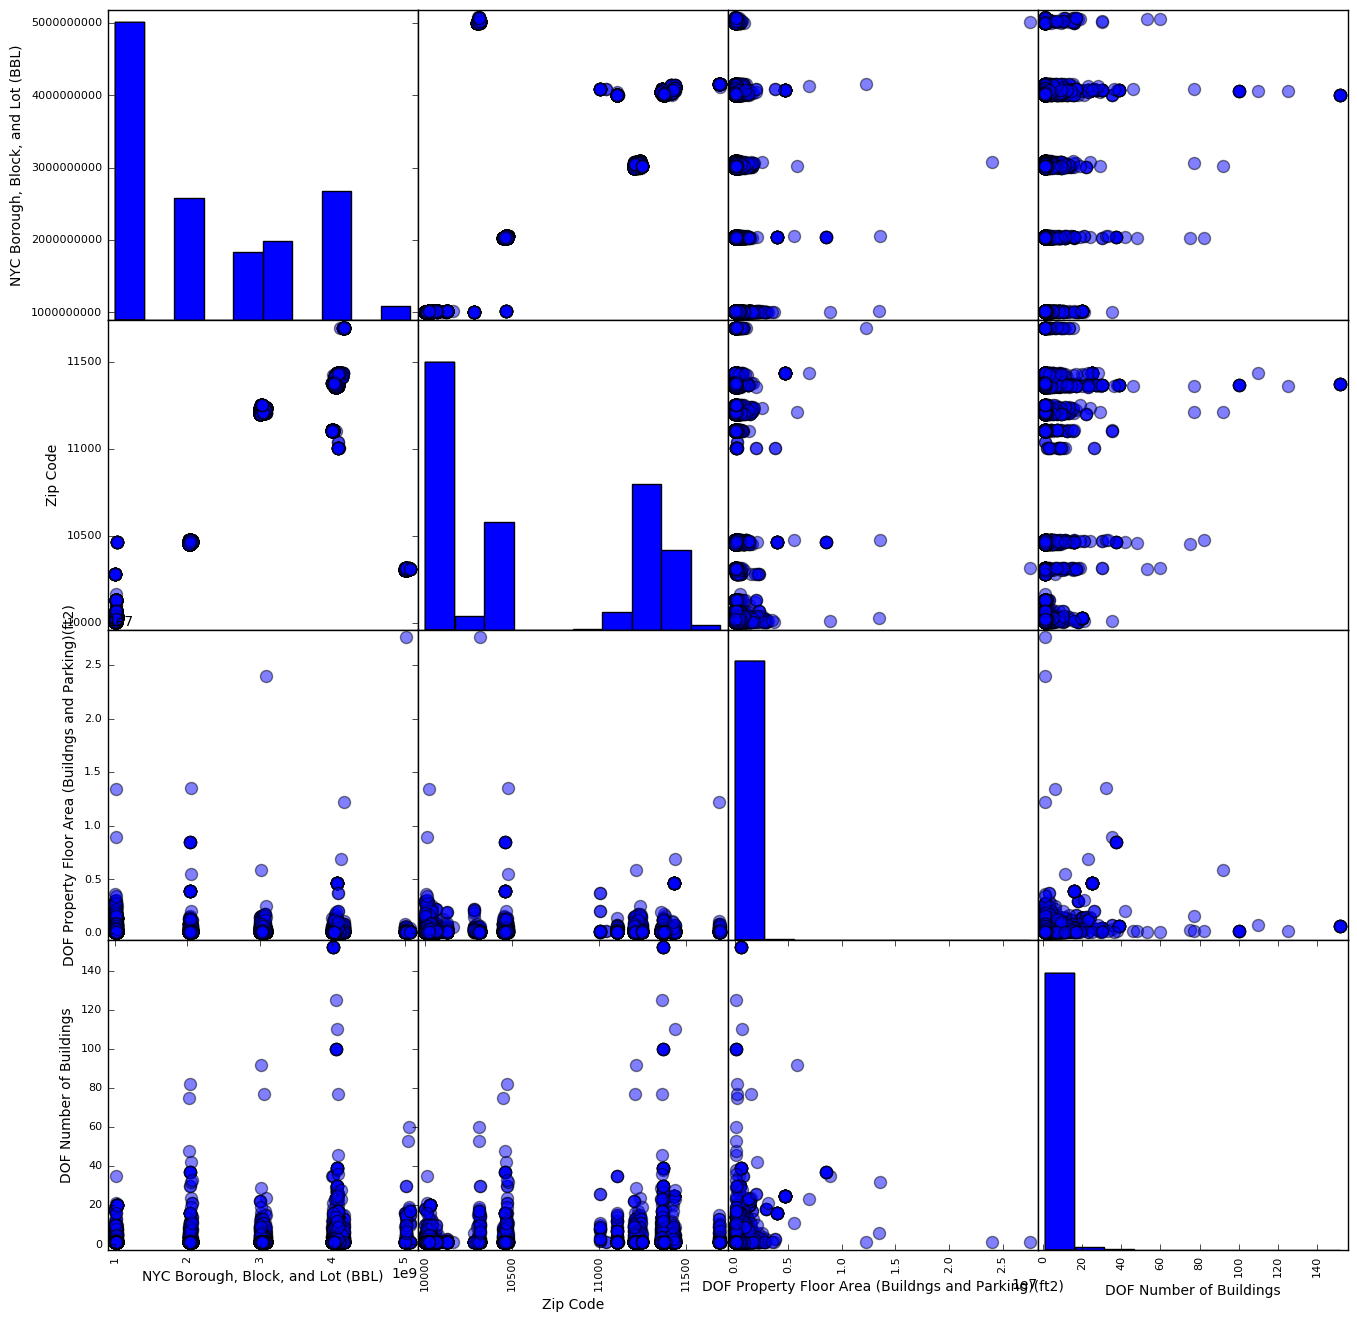

In [42]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

In [43]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [44]:
indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')

invalid entries changed to NaN 15513


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [45]:
bsize.BBL.astype(float)

0        1.015450e+09
1        1.007238e+09
2        1.016800e+09
3        1.013850e+09
4        1.011970e+09
5        1.002360e+09
6        1.008370e+09
7        1.001960e+09
8        1.022240e+09
9        1.011270e+09
10       1.011650e+09
11       1.021740e+09
12       1.009120e+09
13       1.007920e+09
14       1.012110e+09
15       1.011240e+09
16       1.009040e+09
17       1.010090e+09
18       1.020620e+09
19       1.020630e+09
20       1.008940e+09
21       1.005728e+09
22       1.004400e+09
23       1.019470e+09
24       1.008830e+09
25       1.020810e+09
26       1.021610e+09
27       1.008570e+09
28       1.008830e+09
29       1.020410e+09
             ...     
42667    1.014738e+09
42668    1.006208e+09
42669    1.007218e+09
42670    1.013428e+09
42671    1.019448e+09
42672    1.017298e+09
42673    1.018488e+09
42674    1.005008e+09
42675    1.020448e+09
42676    1.004518e+09
42677    1.020958e+09
42678    1.007688e+09
42679    1.008498e+09
42680    1.017298e+09
42681    1

In [46]:
nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)': 'BBL'}, inplace=True)

In [47]:
nrg.rename(columns={'Site EUI(kBtu/ft2)': 'SiteEUI'}, inplace=True)

In [48]:
left = nrg

right = bsize

bblnrgdata = pd.merge(left, right, on='BBL')

In [51]:
bblnrgdata.columns

Index(['BBL', 'Zip Code', 'SiteEUI',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'DOF Number of Buildings', 'BldgArea', 'BldgClass', 'UnitsRes',
       'UnitsTotal', 'ZipCode'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74fda3c160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f74fb19e7b8>]], dtype=object)

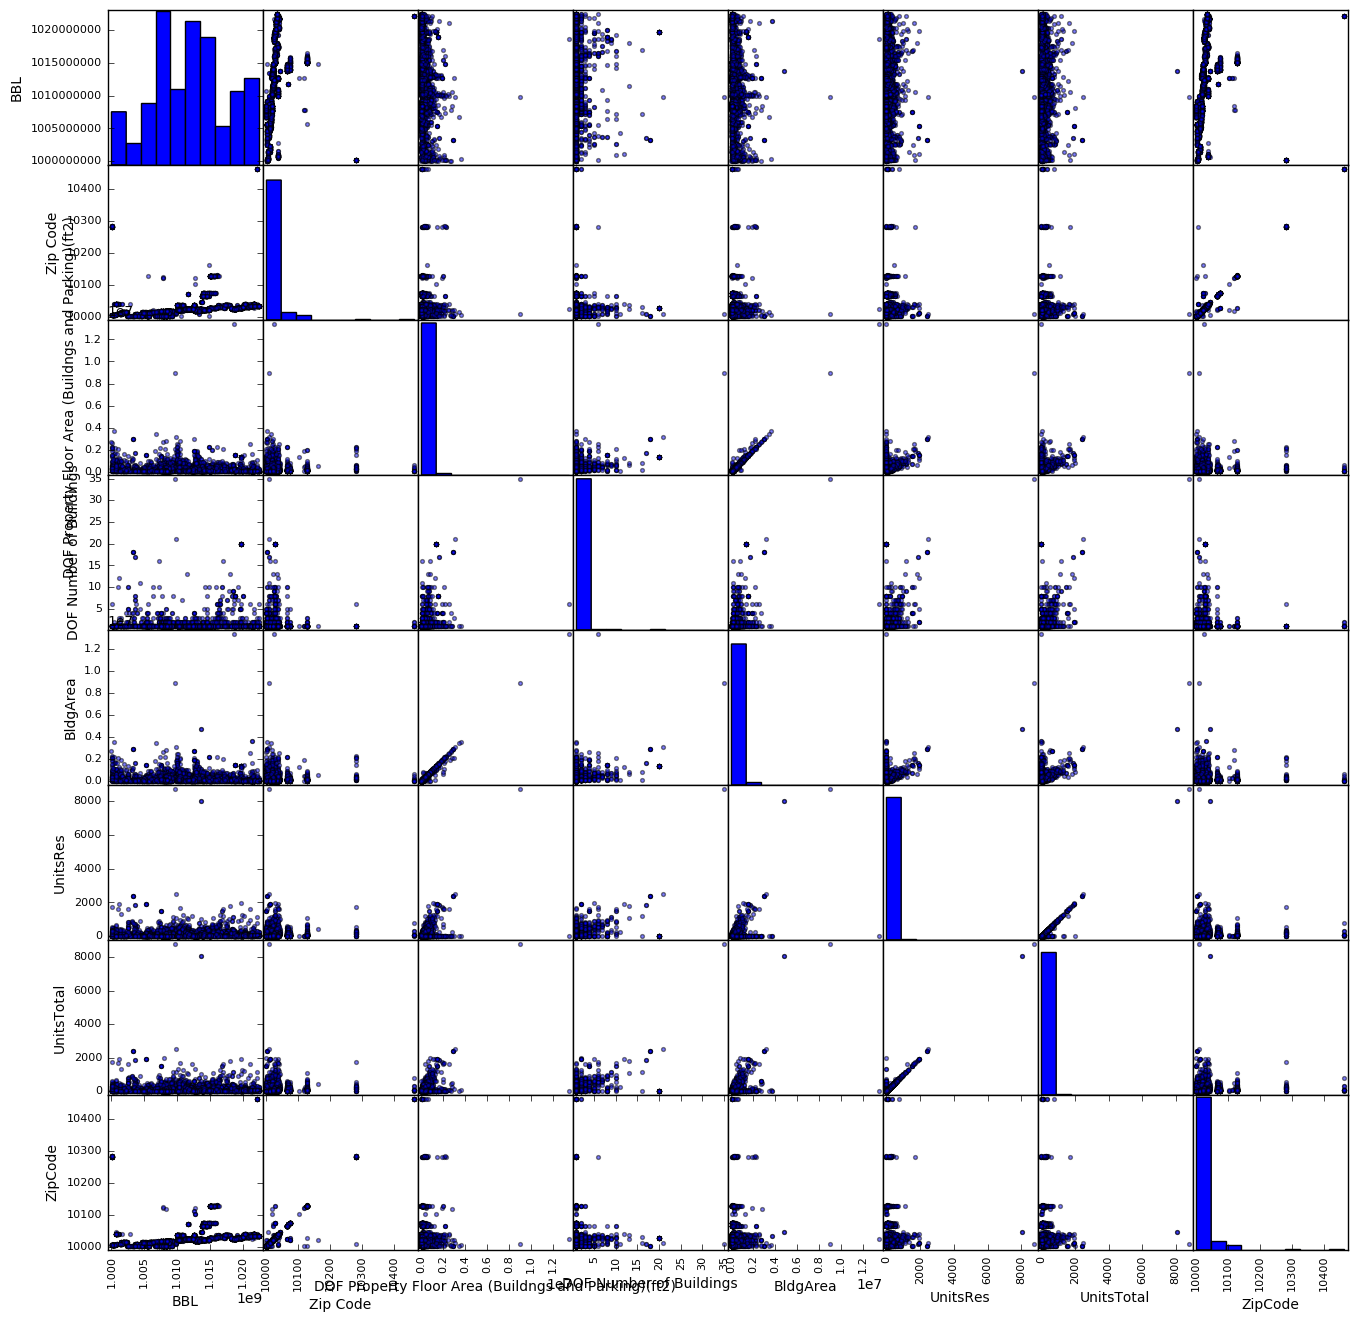

In [49]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

KeyError: 'SiteEUI'

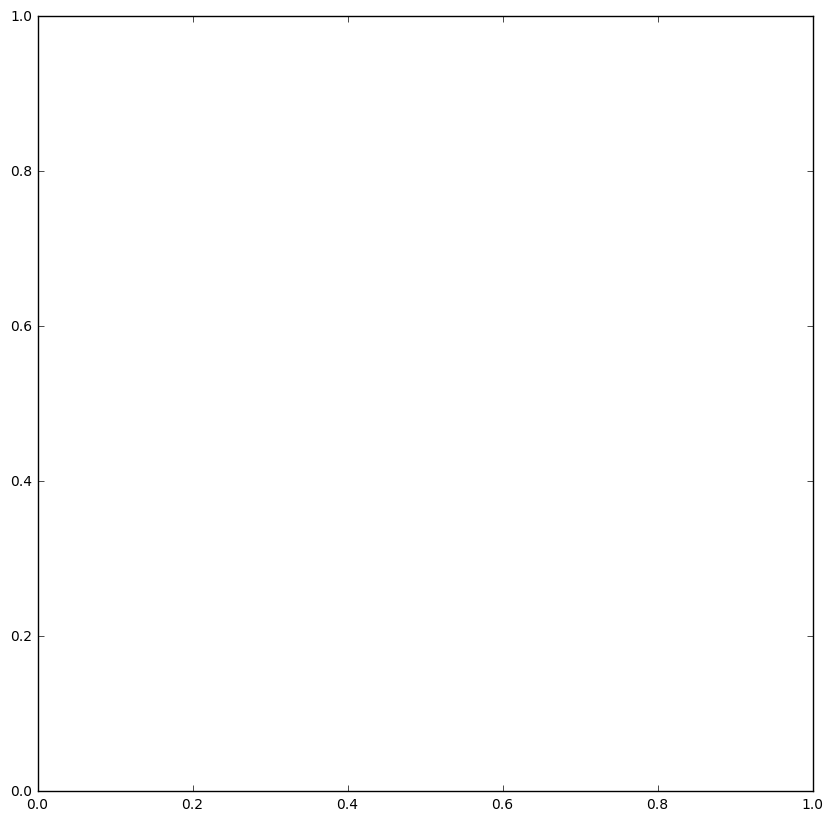

In [50]:
bblnrgdata.plot(x = 'SiteEUI', y = 'UnitsTotal', kind = 'scatter', 
            s = 3, figsize = (10,10), fontsize = 18)
bblnrgdata.set_xlabel('total energy consumption (kBtu)', fontsize = 20)
bblnrgdata.set_ylabel('number of units', fontsize = 20)

KeyError: 'SiteEUI'

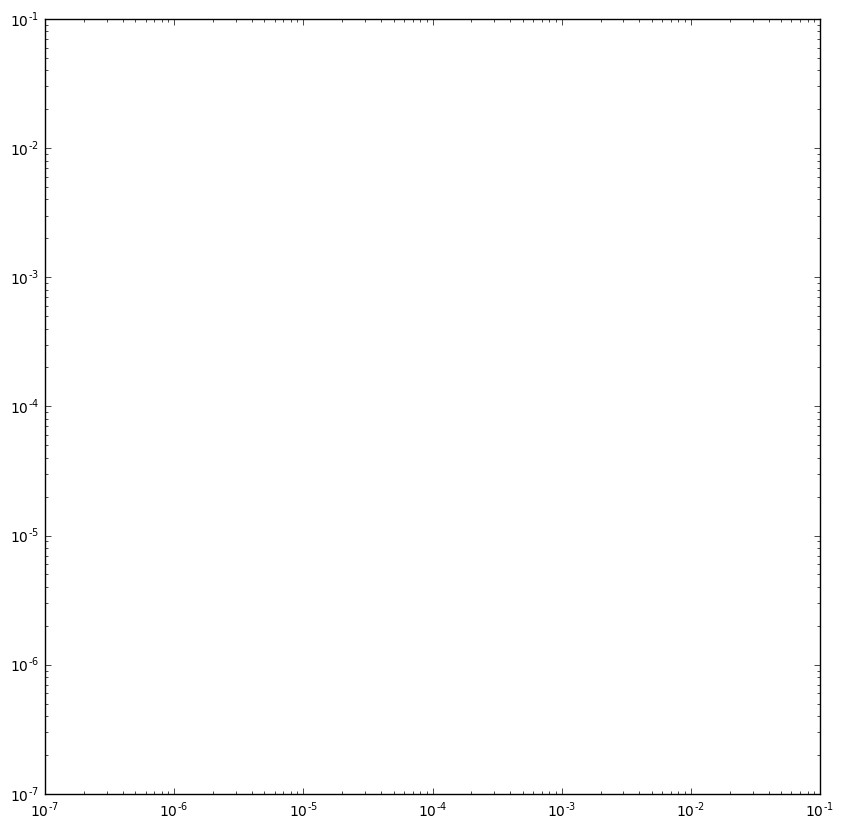

In [22]:
bblnrgdata.plot(x = 'SiteEUI', y = 'UnitsTotal', kind = 'scatter', 
            s = 3, figsize = (10,10), fontsize = 18, loglog=True)

In [53]:
bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

AttributeError: 'DataFrame' object has no attribute 'nrg'

In [54]:
import numpy as np
import pylab as pl
import statsmodels.api  as sm
import statsmodels.formula.api as smf
import pandas as pd

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [55]:
def line(x, pars, err=False):
    if err:
        err = np.random.randn(len(x)) * err
    else:
        err = np.zeros_like(x)
    return pars[0] * x + pars[1] + err, err

In [57]:
x = bblnrgdata

In [70]:
y_model = line(x, 2)

TypeError: 'int' object is not subscriptable

In [66]:
pl.plot(x, y_model, '-')

NameError: name 'y_model' is not defined

In [ ]:
X = sm.add_constant(np.log10(x))

linmodel = sm.OLS(np.log10(y), X, missing='drop').fit()

In [ ]:
x2d = sm.add_constant(x)
lres = sm.OLS(y, x2d).fit()
xfit = sm.add_constant(np.arange(-10,10,0.1))

In [ ]:
lres.summary()

In [ ]:
wres = sm.WLS(y, x2d, weights=(np.abs(e))).fit()
pl.plot(x, y_model, '-')
pl.errorbar(x, y, yerr=e, fmt='.')
pl.plot(np.arange(-10,10,0.1), lres.predict(xfit), '--')
pl.plot(np.arange(-10,10,0.1), wres.predict(xfit), '--')